# Employee Exit Surveys

Working with exit surveys from employees of:
* the Department of Education, Training and Employment (DETE) and 
* the Technical and Further Education (TAFE) institute in Queensland, Australia. 

Stakeholders want to know the following:

* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

They want us to combine the results for both surveys to answer these questions. However, although both used the same survey template, one of them customized some of the answers.

Below is a preview of a couple columns we'll work with from the `dete_survey.csv`:

* `ID`: An id used to identify the participant of the survey
* `SeparationType`: The reason why the person's employment ended
* `Cease Date`: The year or month the person's employment ended
* `DETE Start Date`: The year the person began employment with the DETE

Below is a preview of a couple columns we'll work with from the `tafe_survey.csv`:

* `Record ID`: An id used to identify the participant of the survey
* `Reason for ceasing employment`: The reason why the person's employment ended
* `LengthofServiceOverall. Overall Length of Service at Institute (in years)`: The length of the person's employment (in years)

In [1]:
import numpy as np
import pandas as pd

dete_survey = pd.read_csv('./dataset/dete_survey_2014.csv')
tafe_survey = pd.read_csv('./dataset/tafe_survey_2013.csv', encoding='latin1')

In [2]:
dete_survey.info()
dete_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [3]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [4]:
tafe_survey.info()
tafe_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null int64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-nu

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,634133009996094000,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26  30,Temporary Full-time,Administration (AO),1-2,1-2
1,634133654064531000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,634138845606563000,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,634139903350000000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,634146578511788000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41  45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [5]:
tafe_survey.isnull().sum().sort_values(ascending=False)

Main Factor.     Which of these was the main factor for leaving?    589
InductionInfo. Topic:Did you undertake a Corporate Induction?       270
Contributing Factors. Ill Health                                    265
Contributing Factors. Maternity/Family                              265
Contributing Factors. Career Move - Public Sector                   265
                                                                   ... 
CESSATION YEAR                                                        7
Reason for ceasing employment                                         1
WorkArea                                                              0
Institute                                                             0
Record ID                                                             0
Length: 72, dtype: int64

## Data Cleaning

### Identify Missing Values and Drop Unnecessary Columns

* The `dete_survey` dataframe contains `'Not Stated'` values that indicate values are missing, but they aren't represented as `NaN`.
* Both the `dete_survey` and `tafe_survey` dataframes contain many columns that we don't need to complete our analysis.
* Each dataframe contains many of the same columns, but the column names are different.
* There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.

In [6]:
#using pd.read_csv() function to specify values that should be represented as NaN
dete_survey = pd.read_csv('./dataset/dete_survey_2014.csv', na_values='Not Stated')

dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [7]:
#Dropping columns from both dfs that won't be used in the analysis
#To make dfs easier to work with

dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)

tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

dete_survey.info()
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             788 non-null object
DETE Start Date                        749 non-null float64
Role Start Date                        724 non-null float64
Position                               817 non-null object
Classification                         455 non-null object
Region                                 717 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work envir

Changed `Not Stated` to `NaN` in the `dete_survey` to indicate the values that are missing and so Pandas/during data analysis and cleaning can easily identify these values as missing. 

Removed multiple columns from both datasets/dataframes since we won't be needing the to complete the analysis. De-cluttering. 

### Clean Columns Names

Each dataframe contains many of the same columns, but the column names are different. Below are some of the columns we'd like to use for our final analysis:

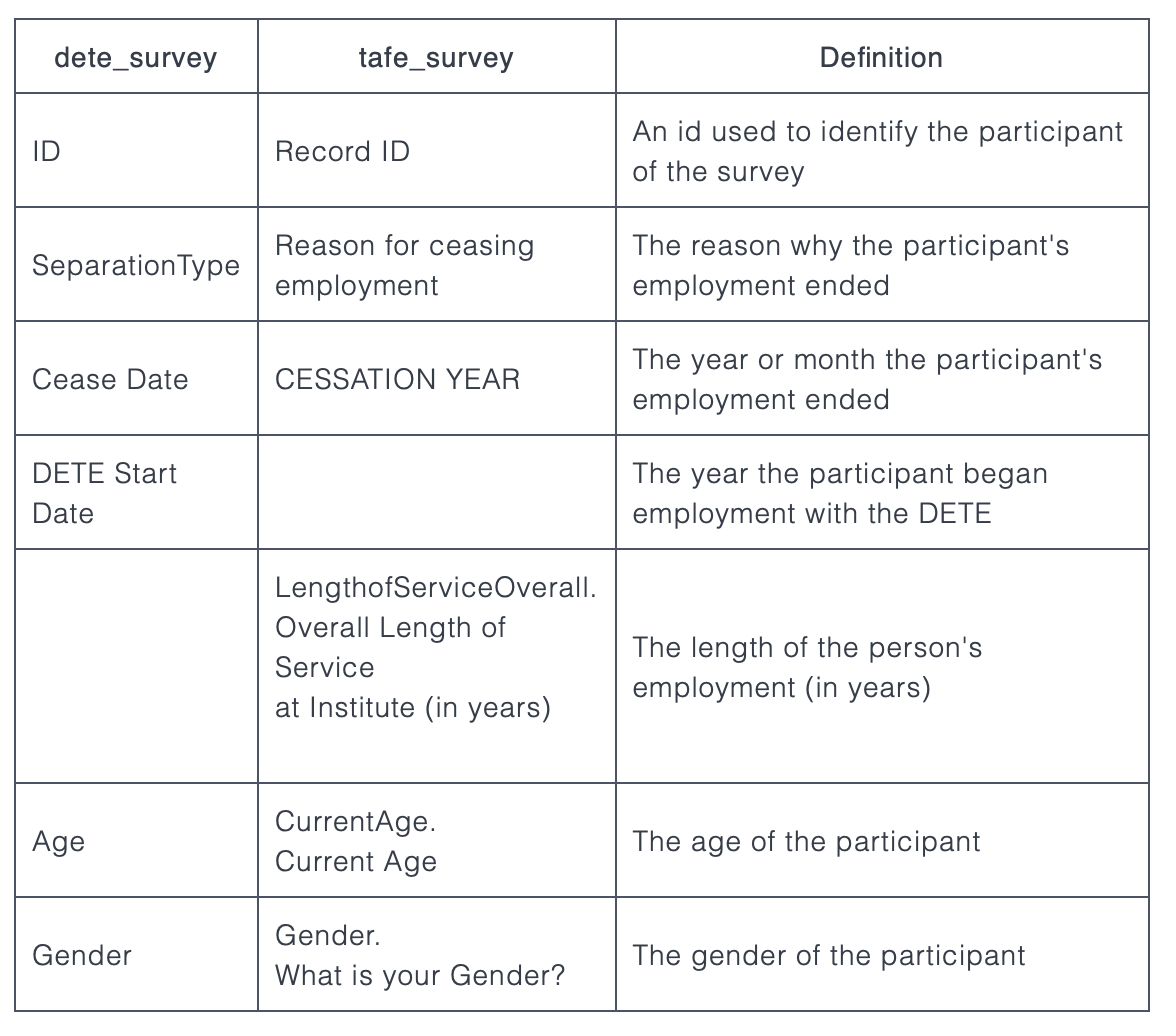

Based on the above, renaming columns that are needed for the final analysis and to match the two dataframes/datasets. 

In [8]:
#renaming the remaining columns in the dete_survey_updated dataframe
dete_survey_updated.columns = dete_survey_updated.columns.str.strip().str.lower().str.replace(' ', '_')

dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [9]:
#using df.rename() method to update columns below in tafe_survey_updated df:

names = {
    'Record ID': 'id',
    'CESSATION YEAR': 'cease_date',
    'Reason for ceasing employment': 'separationtype',
    'Gender. What is your Gender?': 'gender',
    'CurrentAge. Current Age': 'age',
    'Employment Type. Employment Type': 'employment_status',
    'Classification. Classification': 'position',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
    'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service',
}

tafe_survey_updated = tafe_survey_updated.rename(names, axis='columns')

tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender.     What is your Gender?', 'CurrentAge.     Current Age',
       'Employment Type.     Employment Type',
       'Classification.     Classification', 'institute_service',
       'role_service'],
      dtype='object')

In [10]:
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [11]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,institute_service,role_service
0,634133009996094000,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26  30,Temporary Full-time,Administration (AO),1-2,1-2
1,634133654064531000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,634138845606563000,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,634139903350000000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,634146578511788000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41  45,Permanent Full-time,Teacher (including LVT),3-4,3-4


### Filter the Data

Removing more data that we don't need. 

In each df look at unique values in `seperation`, contains different seperation types. For this analysis focused on respondants who resigned so seperation type contains the string `Resignation`. 

Note that `dete_survey_updated` dataframe contains multiple separation types with the string `'Resignation'`:

* Resignation-Other reasons
* Resignation-Other employer
* Resignation-Move overseas/interstate

Remember that we'll have to account for each of these variations so we don't unintentionally drop data!

In [12]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [13]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [14]:
# selecting only data for survey respondents with 'Resignation' seperation type.

tafe_resignations = tafe_survey_updated.copy()
tafe_resignations = tafe_resignations[tafe_resignations['separationtype'] == 'Resignation']

tafe_resignations.head()
print(tafe_resignations.columns)

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender.     What is your Gender?', 'CurrentAge.     Current Age',
       'Employment Type.     Employment Type',
       'Classification.     Classification', 'institute_service',
       'role_service'],
      dtype='object')


In [15]:
dete_resignations = dete_survey_updated.copy()

resig_filter = (dete_resignations['separationtype'] =='Resignation-Other reasons') | (dete_resignations['separationtype'] == 'Resignation-Other employer') | (dete_resignations['separationtype'] == 'Resignation-Move overseas/interstate')
dete_resignations = dete_resignations[resig_filter]

dete_resignations['separationtype'].value_counts()

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

### Verify the Data

Now, before we start cleaning and manipulating the rest of our data, let's verify that the data doesn't contain any major inconsistencies (to the best of our knowledge). 

In this step, we'll focus on verifying that the years in the `cease_date` and `dete_start_date` columns make sense. However, we encourage you to check the data for other issues as well!

* Since the `cease_date` is the last year of the person's employment and the `dete_start_date` is the person's first year of employment, it wouldn't make sense to have years after the current date.
* Given that most people in this field start working in their 20s, it's also unlikely that the `dete_start_date` was before the year 1940.

If we have many years higher than the current date or lower than 1940, we wouldn't want to continue with our analysis, because it could mean there's something very wrong with the data. If there are a small amount of values that are unrealistically high or low, we can remove them.

In [16]:
# checking years in each dataframe for logical inconsistencies
# 1. cleaning cease_data column in dete_resignations

dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2012      1
09/2010      1
2010         1
07/2006      1
Name: cease_date, dtype: int64

In [17]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str[-4:].astype(float)

dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [18]:
# 2. dete_resignation: checking values in the dete_start_date columns

dete_resignations['dete_start_date'].value_counts().sort_index(ascending=False)

2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
2008.0    22
2007.0    21
2006.0    13
2005.0    15
2004.0    14
2003.0     6
2002.0     6
2001.0     3
2000.0     9
1999.0     8
1998.0     6
1997.0     5
1996.0     6
1995.0     4
1994.0     6
1993.0     5
1992.0     6
1991.0     4
1990.0     5
1989.0     4
1988.0     4
1987.0     1
1986.0     3
1985.0     3
1984.0     1
1983.0     2
1982.0     1
1980.0     5
1977.0     1
1976.0     2
1975.0     1
1974.0     2
1973.0     1
1972.0     1
1971.0     1
1963.0     1
Name: dete_start_date, dtype: int64

In [19]:
print(tafe_resignations.columns)

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender.     What is your Gender?', 'CurrentAge.     Current Age',
       'Employment Type.     Employment Type',
       'Classification.     Classification', 'institute_service',
       'role_service'],
      dtype='object')


In [20]:
# 3. tafe_resignation: checking values in cease_date columns

tafe_resignations['cease_date'].value_counts().sort_index(ascending=False)

2013.0     55
2012.0     94
2011.0    116
2010.0     68
2009.0      2
Name: cease_date, dtype: int64

From the work we did in the last screen, we can verify:

1. There aren't any major issues with the years.
2. The years in each dataframe don't span quite the same number of years. We'll leave it up to your discretion to drop any years you don't think are needed for the analysis.

### Create a New Column

Now that we've verified the years in the `dete_resignations` dataframe, we'll use them to create a new column.

`tafe_resignations` dataframe already contains a "service" column, which we renamed to `institute_service`. In order to analyze both surveys together, we'll have to create a corresponding `institute_service` column in `dete_resignations`.

Use it to analyze survey respondents according to their length of employment.

Can do this by subtracting `dete_start_date` from `cease_date` in `dete_resignations` df. 

In [21]:
# subtracting `dete_start_date` from `cease_date` in `dete_resignations` df

dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

dete_resignations['institute_service'].value_counts().sort_index(ascending=False)

49.0     1
42.0     1
41.0     1
39.0     3
38.0     1
36.0     2
35.0     1
34.0     1
33.0     1
32.0     3
31.0     1
30.0     2
29.0     1
28.0     2
27.0     1
26.0     2
25.0     2
24.0     4
23.0     4
22.0     6
21.0     3
20.0     7
19.0     3
18.0     5
17.0     6
16.0     5
15.0     7
14.0     6
13.0     8
12.0     6
11.0     4
10.0     6
9.0     14
8.0      8
7.0     13
6.0     17
5.0     23
4.0     16
3.0     20
2.0     14
1.0     22
0.0     20
Name: institute_service, dtype: int64

### Identify Dissatisfied Employees

Identifying any employees who resigned because they were dissatisfied.

1. tafe_survey_updated:
    * `Contributing Factors. Dissatisfaction`
    * `Contributing Factors. Job Dissatisfaction`
2. dete_survey_updated:
    * `job_dissatisfaction`
    * `dissatisfaction_with_the_department`
    * `physical_work_environment`
    * `lack_of_recognition`
    * `lack_of_job_security`
    * `work_location`
    * `employment_conditions`
    * `work_life_balance`
    * `workload`
    
If the employee indicated any of the factors above caused them to resign, we'll mark them as `dissatisfied` in a new column.After our changes, the new dissatisfied column will contain just the following values:
* True: indicates a person resigned because they were dissatisfied in some way
* False: indicates a person resigned because of a reason other than dissatisfaction with the job
* NaN: indicates the value is missing

In [22]:
# Check unique values
# tafe_survey_updated:
print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False))
print('\n')
print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False))


-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64


-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


In [23]:
# Update values in the contributing factors columns to True, False or NaN values

def update_vals(val):
    if val == '-':
        return False
    elif pd.isnull(val):
        return np.nan
    else:
        return True
            
tafe_factors = ['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']
tafe_resignations['dissatisfied'] = tafe_resignations[tafe_factors].applymap(update_vals).any(1, skipna=False)

tafe_resignations_up = tafe_resignations.copy()

# Chek the unique value after the updates
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)


False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [24]:
# dete_resignations:
# Update the values in columns related to dissatisfaction to be either True, False, or NaN

dete_factors = [
    'job_dissatisfaction',
    'dissatisfaction_with_the_department',
    'physical_work_environment',
    'lack_of_recognition',
    'lack_of_job_security',
    'work_location',
    'employment_conditions',
    'work_life_balance',
    'workload'
]

dete_resignations['dissatisfied'] = dete_resignations[dete_factors].any(1, skipna=False)

dete_resignations_up = dete_resignations.copy()

# Chek the unique value after the updates
dete_resignations['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

In [25]:
print(dete_resignations_up.columns)
print(tafe_resignations_up.columns)

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb', 'institute_service', 'dissatisfied'],
      dtype='object')
Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing 

### Combining the Data

Ready to combine our datasets! Our end goal is to aggregate the data according to the `institute_service` column, so when you combine the data, think about how to get the data into a form that's easy to aggregate.

In [26]:
# Adding institute column

dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

# Combining the dataframes
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index = True)

/Users/Roya/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


In [27]:
# Verify number of non null valuein each column
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
Classification.     Classification                     290
Employment Type.     Employment Type                   290
CurrentAge.     Current Age                            290
Gender.     What is your Gender?                       290
role_service                                           290
gender                                                 302
age                                                    3

In [28]:
# Still have columns left in df that don't need to complete our data analysis
# Dropping any columns with less than 500 non null values

combined_updated = combined.dropna(thresh = 500, axis=1).copy()

combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 6 columns):
cease_date           635 non-null float64
dissatisfied         643 non-null object
id                   651 non-null int64
institute            651 non-null object
institute_service    563 non-null object
separationtype       651 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 30.6+ KB


In [29]:
combined_updated.head()

,cease_date,dissatisfied,id,institute,institute_service,separationtype
0,2012.0,False,4,DETE,7,Resignation-Other reasons
1,2012.0,True,6,DETE,18,Resignation-Other reasons
2,2012.0,False,9,DETE,3,Resignation-Other reasons
3,2012.0,True,10,DETE,15,Resignation-Other employer
4,2012.0,False,12,DETE,3,Resignation-Move overseas/interstate


### Cleaning the Service Column

The `institue_service` column is tricky to clean because it currently contains values in a couple different forms.

Basing our anlaysis on this article, which makes the argument https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage that understanding employee's needs according to career stage instead of age is more effective.

Using slightly modified definitions below:
* New: Less than 3 years at a company
* Experienced: 3-6 years at a company
* Established: 7-10 years at a company
* Veteran: 11 or more years at a company

Will categorize the values in `institute_serice` based on above definitions.

In [30]:
# Check unique values
combined_updated['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
22.0                   6
17.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
39.0                   3
32.0                   3
21.0                   3
26.0                   2
28.0                   2
30.0                   2
36.0                   2
25.0                   2


In [31]:
# Extract years of service and convert type to float

combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')

combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')

In [32]:
# Check the years extracted are correct
combined_updated['institute_service_up'].value_counts(dropna=False)

1.0     159
NaN      88
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
22.0      6
10.0      6
17.0      6
14.0      6
12.0      6
16.0      5
18.0      5
24.0      4
23.0      4
21.0      3
39.0      3
32.0      3
19.0      3
36.0      2
30.0      2
25.0      2
26.0      2
28.0      2
42.0      1
29.0      1
35.0      1
27.0      1
41.0      1
49.0      1
38.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_up, dtype: int64

In [33]:
# Map each value to one of the career stage defitions above

def assign_stage(val):
    if val >= 11:
        return "Veteran"
    elif 7 <= val < 11:
        return "Established"
    elif 3 <= val < 7:
        return "Experienced"
    elif pd.isnull(val):
        return np.nan
    else:
        return "New"

combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(assign_stage)

# Check the update
combined_updated['service_cat'].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

## Performing Initial Analysis



* Are employees who only worked for the institutes for a short period of time (`service_cat`) resigning due to some kind of dissatisfaction (`dissatisfied`)? What about employees who have been there longer?
* Are younger employees (`age`) resigning due to some kind of dissatisfaction (`dissatisfied`)? What about older employees?

In [34]:
# Check number of True and False in dissatisfied column

combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [35]:
# Replacing missing values in 'dissatisfied' column with the value that occurs mos frequently in column

combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

In [36]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

In [37]:
# Calculating percentage of dissatisfied employees in each service_cat

disc_pct = combined_updated.pivot_table(values='dissatisfied', index='service_cat')

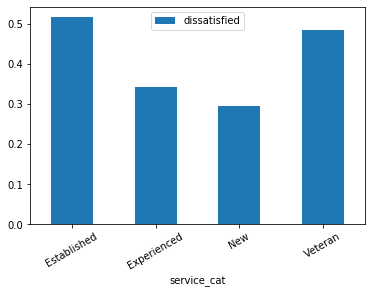

In [38]:
#PLot the results

%matplotlib inline

disc_pct.plot(kind='bar', rot=30)

From the initial analysis above, we can tentatively conclude that employees with 7 or more years of service are more likely to resign due to some kind of dissatisfaction with the job than employees with less than 7 years of service. However, we need to handle the rest of the missing data to finalize our analysis.

## Next steps

We recommend that you continue with the following steps:

* Decide how to handle the rest of the missing values. Then, aggregate the data according to the `service_cat` column again. How many people in each career stage resigned due to some kind of dissatisfaction?
* Clean the `age` column. How many people in each age group resgined due to some kind of dissatisfaction?
* Instead of analyzing the survey results together, analyze each survey separately. Did more employees in the DETE survey or TAFE survey end their employment because they were dissatisfied in some way?

In [39]:
combined_updated.isnull().sum()

cease_date              16
dissatisfied             0
id                       0
institute                0
institute_service       88
separationtype           0
institute_service_up    88
service_cat             88
dtype: int64

In [40]:
# Extract years of service and convert type to float

combined_updated['cease_date_str'] = combined_updated['cease_date'].astype('str')

combined_updated['cease_date_str'].value_counts(dropna=False)

2012.0    223
2013.0    201
2011.0    116
2010.0     70
2014.0     22
nan        16
2009.0      2
2006.0      1
Name: cease_date_str, dtype: int64

In [41]:
combined_updated[combined_updated['cease_date'].isnull()]

,cease_date,dissatisfied,id,institute,institute_service,separationtype,institute_service_up,service_cat,cease_date_str
255,NaN,True,685,DETE,NaN,Resignation-Other employer,NaN,NaN,nan
263,NaN,False,696,DETE,NaN,Resignation-Other reasons,NaN,NaN,nan
269,NaN,False,706,DETE,NaN,Resignation-Other reasons,NaN,NaN,nan
270,NaN,True,711,DETE,NaN,Resignation-Other employer,NaN,NaN,nan
273,NaN,False,726,DETE,NaN,Resignation-Other reasons,NaN,NaN,nan
289,NaN,False,772,DETE,NaN,Resignation-Other reasons,NaN,NaN,nan
291,NaN,False,776,DETE,NaN,Resignation-Other employer,NaN,NaN,nan
294,NaN,False,790,DETE,NaN,Resignation-Other employer,NaN,NaN,nan
297,NaN,True,793,DETE,NaN,Resignation-Other reasons,NaN,NaN,nan
299,NaN,False,799,DETE,NaN,Resignation-Move overseas/interstate,NaN,NaN,nan


Index 372 and 381 both have institute_service but no cease_date. 

Will filter people with `insitute_service` of the same amount (11-20) within `insititute` `TAFE` and get an average `cease_date` to apply to these two people. 

In [42]:
cease_null = combined_updated[(combined_updated['institute'] == 'TAFE') & (combined_updated['institute_service'] == '11-20')].copy()

cease_null['cease_date'].mean()

2011.2083333333333

In [43]:
combined_updated[combined_updated['institute_service'] == '11-20']['cease_date'] = combined_updated[combined_updated['institute_service'] == '11-20']['cease_date'].fillna(2011)


/Users/Roya/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
combined_updated.isnull().sum()

cease_date              16
dissatisfied             0
id                       0
institute                0
institute_service       88
separationtype           0
institute_service_up    88
service_cat             88
cease_date_str           0
dtype: int64

In [45]:
combined_updated[combined_updated['institute_service_up'].isnull()].head()

,cease_date,dissatisfied,id,institute,institute_service,separationtype,institute_service_up,service_cat,cease_date_str
7,2012.0,True,17,DETE,NaN,Resignation-Other reasons,NaN,NaN,2012.0
17,2012.0,True,40,DETE,NaN,Resignation-Move overseas/interstate,NaN,NaN,2012.0
37,2012.0,True,107,DETE,NaN,Resignation-Other reasons,NaN,NaN,2012.0
50,2012.0,False,141,DETE,NaN,Resignation-Other employer,NaN,NaN,2012.0
62,2012.0,False,197,DETE,NaN,Resignation-Other reasons,NaN,NaN,2012.0


In [46]:
combined_updated['cease_date'].describe()

count     635.000000
mean     2011.963780
std         1.079028
min      2006.000000
25%      2011.000000
50%      2012.000000
75%      2013.000000
max      2014.000000
Name: cease_date, dtype: float64

In [47]:
combined_updated[combined_updated['institute_service_up'].isnull()]['cease_date'].describe()

count      74.000000
mean     2011.635135
std         1.165419
min      2010.000000
25%      2010.250000
50%      2012.000000
75%      2013.000000
max      2013.000000
Name: cease_date, dtype: float64